# Iris Flower dataset classification

### 1. Prepare Problem
    ## a) Load libraries
    ## b) Load dataset
### 2. Summarize Data
    ## a) Descriptive statistics
    ## b) Data visualizations
### 3. Prepare Data
    ## a) Data Cleaning
    ## b) Feature Selection
    ## c) Data Transforms
### 4. Evaluate Algorithms
    ## a) Split-out validation dataset
    ## b) Test options and evaluation metric
    ## c) Spot Check Algorithms
    ## d) Compare Algorithms
### 5. Improve Accuracy
    ## a) Algorithm Tuning
    ## b) Ensembles
### 6. Finalize Model
    ## a) Predictions on validation dataset
    ## b) Create standalone model on entire training dataset
    ## c) Save model for later use

### 1. Prepare Problem

In [2]:
## Load libraries

from pandas import read_csv
from pandas.plotting import scatter_matrix

from matplotlib import pyplot

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [3]:
## Load Dataset

filename = 'iris.data.csv'
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = read_csv(filename, names=names)

### 2. Summarize Data

In [4]:
## a) Descriptive statistics
# Note 
#    rows / instances = 150
#    cols / attributes = 5 (input - 4, response - 1)
print(dataset.shape)

(150, 5)


In [5]:
# Note
#    All features(cols/attributes) are numeric except the response variable

dataset.head(20)

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [6]:
# Note
#    features are in same units(cms)
#    features are of similar ranges
#      sepal-length (4.3 - 7.9)
#      sepal-width  (2.0 - 4.4)
#      petal-length (1.0 - 6.9)
#      petal-width  (0.1 - 2.5)

dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# Note
#    Each class of response variable has same size (i.e. all classes are equally distributed) = 50, i.e. 33% of dataset

dataset.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

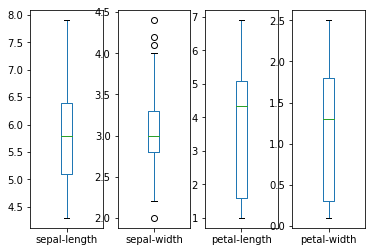

In [8]:
## b) Data visualizations
## Univariate plots - to understand each feature
## Box and Whisker plots of input features
##                          Sepal       Sepal     Petal     Petal
##                          Length      Width     Length    Width
##                       ------------------------------------------
##   Center           -     5.84       3.05       3.76      1.2     
##   Spread           -     3.6        2.4        5.9       2.4
##   Shape            -   ~ Gaussian ~ Gaussian   Right     Left
##                                                Skewed    Skewed
##   Unusual Features -     None       Outliers   None      None
##                       -------------------------------------------
##   - Relatively Sepal-length, sepal-width (when compared with petal-length, petal-width) appear Gauss distributed.

dataset.plot(kind='box', subplots=True, layout=(1, 4), sharex=True, sharey=False)
pyplot.show()

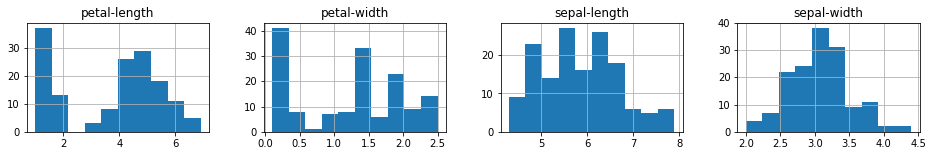

In [9]:
## Histograms - perhaps two features follow Gaussian distribution
## Note:
##    petal-length, petal-width:
##      - non-symmetric, bimodal
##    sepal-length, sepal-width:
##      - non-symmetric
dataset.hist(layout=(1,4), figsize=(16,2))
pyplot.show()

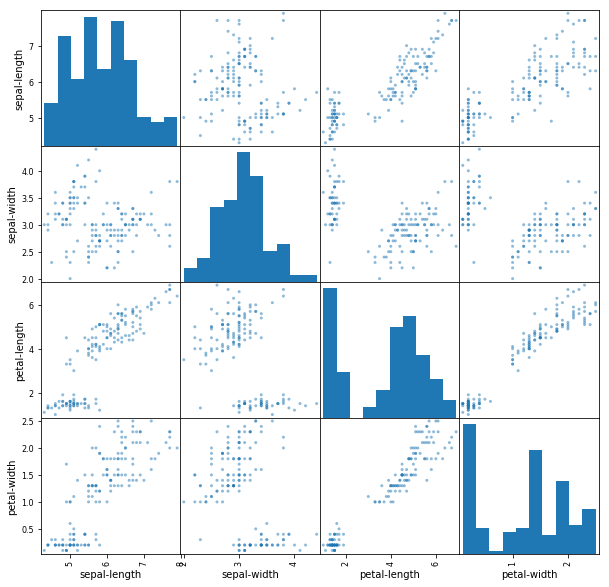

In [10]:
## Multivariate plots - to understand relationships between features
##                                   Linearity         Slope  Strength    Unusual features
##                                  ------------------------------------------------------
##   Sepal length and petal length - Somewhat Linear    +ve     weak      None
##   Sepal length and petal width  - Somewhat Linear    +ve     weak      None
##   Petal length and petal width  - Linear             +ve     weak      None
##   Petal length and petal width  - Linear             +ve     weak      None
##                                 -------------------------------------------------------

scatter_matrix(dataset, figsize=(10, 10))
pyplot.show()

### 3. Prepare Data
    ## a) Data Cleaning
    ## b) Feature Selection
    ## c) Data Transforms

This step is not required as 
 - the data is already clean, 
 - we don't have excess features and 
 - no nee of any data transformation

### 4. Evaluate Algorithms

    ## a) Split-out validation dataset

In [11]:
# We split dataset into train(80%) and validation (20%) parts

array = dataset.values
X = array[:, 0:4]
Y = array[:, 4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

    ## b) Test options and evaluation metric

In [ ]:
# Further, we use 10-fold; 9 parts of training and 1 part of testing repeatedly to cover entire training data
# We use accuracy from the training and testing sets


    ## c) Spot Check Algorithms

In [15]:
# We use 2 Linear models
#    - Logistic Regression (LR)
#    - Linear Discriminant Analysis (LDA)
#    use 4 non-linear models
#    - k-Nearest Neighbors (KNN)
#    - Classification and Regression Trees (KART)
#    - Gaussian Naive Bayes (NB)
#    - Support Vector Machines (SVM)
# as spot check models

# Note: The book shows the best model as 'KNN', but for me the best is 'SVM' (may be the dataset is changed)

models = []
models.append(('LR', LogisticRegression(solver='lbfgs', multi_class='auto')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LR 0.983333 (0.033333)
LDA 0.975000 (0.038188)
KNN 0.983333 (0.033333)
CART 0.975000 (0.038188)
NB 0.975000 (0.053359)
SVM 0.991667 (0.025000)


    ## d) Compare Algorithms

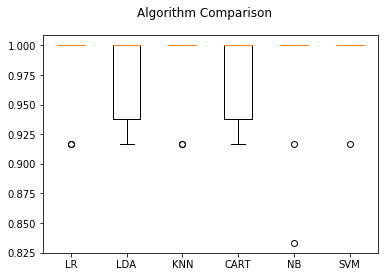

In [16]:
# I did not understand this

fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [17]:
# Let us make predictions on the validation dataset using the best model obtained in previous step

svm = SVC(gamma='auto')
svm.fit(X_train, Y_train)
predictions = svm.predict(X_validation)

print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9333333333333333
[[ 7  0  0]
 [ 0 10  2]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.83      0.91        12
 Iris-virginica       0.85      1.00      0.92        11

      micro avg       0.93      0.93      0.93        30
      macro avg       0.95      0.94      0.94        30
   weighted avg       0.94      0.93      0.93        30

